# Import libraries

In [61]:
import face_recognition
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Look of Dataset

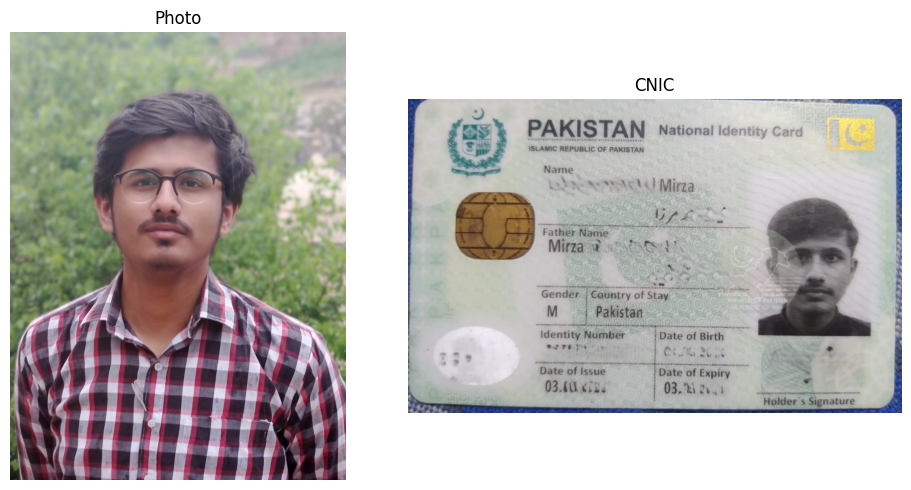

In [67]:
# Load the images
photo_image = cv2.imread('pic1.jpg')
cnic_image = cv2.imread('cnic1.jpg')

# Function to display images in a subplot
def show_images_in_subplot(images, titles):
    # Create a figure with subplots
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(10, 5))
    
    for ax, img, title in zip(axes, images, titles):
        rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        ax.imshow(rgb_image)
        ax.set_title(title)
        ax.axis('off')  # Hide axes
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Display the images
show_images_in_subplot([photo_image, cnic_image], ['Photo', 'CNIC'])

# Detecting Faces

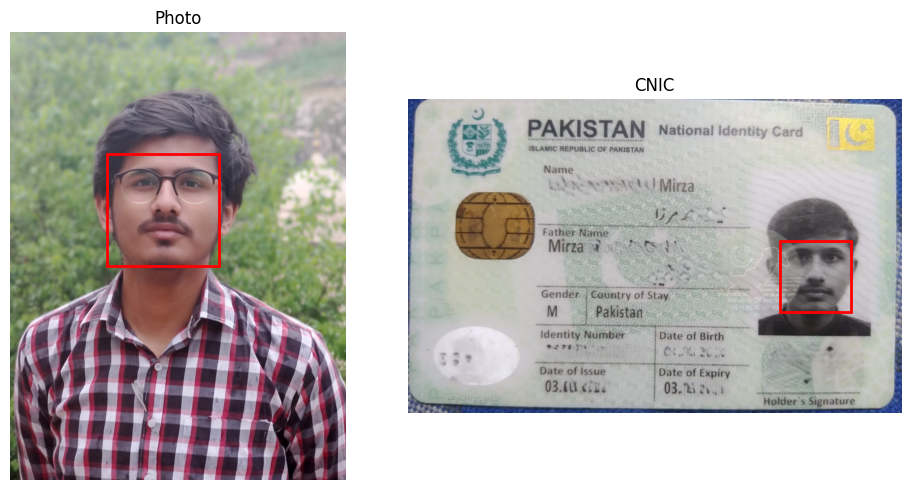

In [68]:
def add_bbox(images, titles):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(10, 5))
    
    for ax, img, title in zip(axes, images, titles):
        rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        face_locations = face_recognition.face_locations(img)  # Get face locations
        
        ax.imshow(rgb_image)
        
        for (top, right, bottom, left) in face_locations:
            # Draw a rectangle around the face
            ax.add_patch(plt.Rectangle((left, top), right - left, bottom - top, fill=False, color='red', linewidth=2))
        
        ax.set_title(title)
        ax.axis('off')  # Hide axes
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Display images with bounding boxes
add_bbox([photo_image, cnic_image], ['Photo', 'CNIC'])

# Define functions

In [69]:
def get_face_encoding(image):
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) == 0:
        raise ValueError("No face found in the image.")
    return face_recognition.face_encodings(image, known_face_locations=face_locations)[0]

def compare_faces(encoding1, encoding2, tolerance=0.5):
    results = face_recognition.compare_faces([encoding1], encoding2, tolerance=tolerance)
    return results[0]

In [70]:
# Get face encodings
photo_encoding = get_face_encoding(photo_image)
cnic_encoding = get_face_encoding(cnic_image)

# Compare faces
is_same_person = compare_faces(photo_encoding, cnic_encoding)

if is_same_person:
    print("Same person.")
else:
    print("Different person.")


Same person.


# Detecting Faces using CNIC

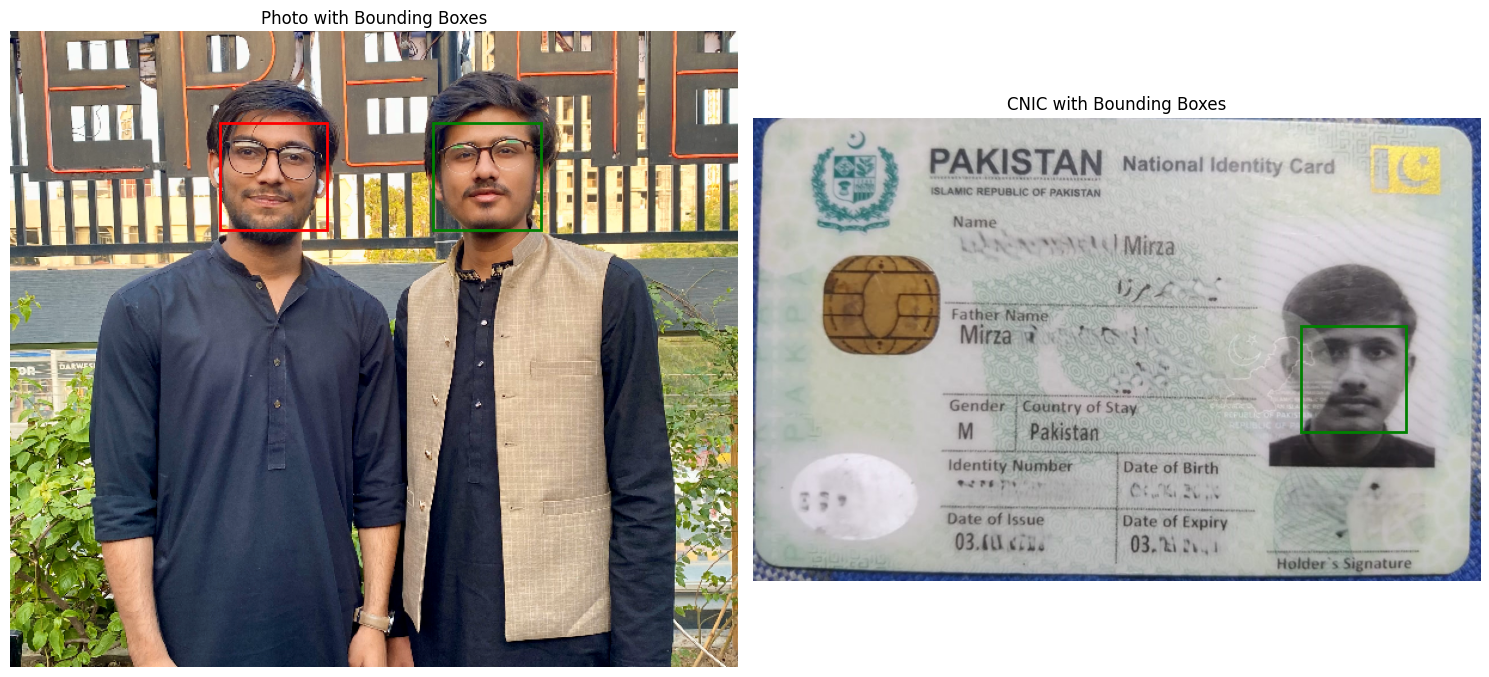

In [73]:
# Load the images
photo_image = cv2.imread('multi_pic.png')
cnic_image = cv2.imread('cnic1.jpg')

def show_images_with_matching_faces(photo_image, cnic_image):
    # Get face encoding for CNIC
    cnic_encoding = get_face_encoding(cnic_image)

    # Prepare the figure for subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Process the photo image
    rgb_photo = cv2.cvtColor(photo_image, cv2.COLOR_BGR2RGB)
    face_locations_photo = face_recognition.face_locations(photo_image)
    face_encodings_photo = face_recognition.face_encodings(photo_image, face_locations_photo)

    # Display photo with bounding boxes
    axes[0].imshow(rgb_photo)
    for (top, right, bottom, left), face_encoding in zip(face_locations_photo, face_encodings_photo):
        matches = face_recognition.compare_faces([cnic_encoding], face_encoding)
        color = 'green' if matches[0] else 'red'
        axes[0].add_patch(plt.Rectangle((left, top), right - left, bottom - top, fill=False, color=color, linewidth=2))
    axes[0].set_title('Photo with Bounding Boxes')
    axes[0].axis('off')

    # Process the CNIC image
    rgb_cnic = cv2.cvtColor(cnic_image, cv2.COLOR_BGR2RGB)
    face_locations_cnic = face_recognition.face_locations(cnic_image)
    face_encodings_cnic = face_recognition.face_encodings(cnic_image, face_locations_cnic)

    # Display CNIC with bounding boxes
    axes[1].imshow(rgb_cnic)
    for (top, right, bottom, left), face_encoding in zip(face_locations_cnic, face_encodings_cnic):
        axes[1].add_patch(plt.Rectangle((left, top), right - left, bottom - top, fill=False, color='green', linewidth=2))
    axes[1].set_title('CNIC with Bounding Boxes')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

# Display the images with bounding boxes
show_images_with_matching_faces(photo_image, cnic_image)